In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import sys
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from pycocotools import mask as mask_utils

In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

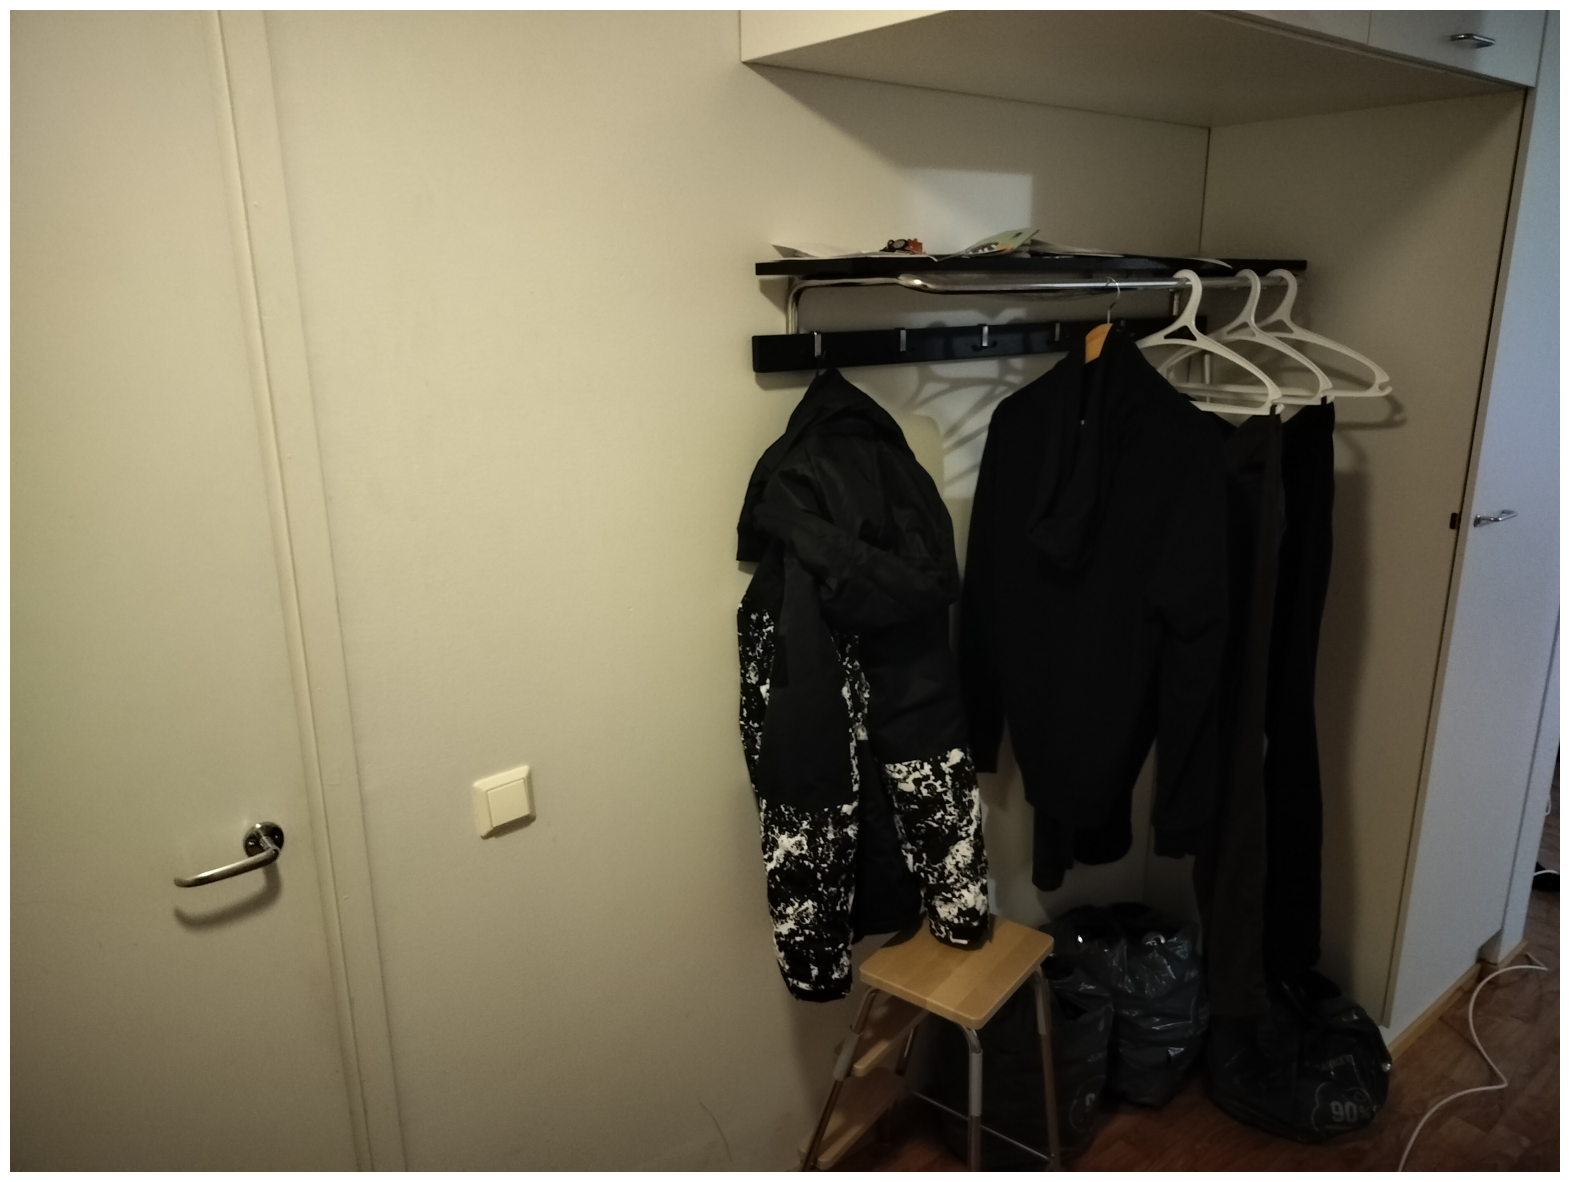

(3000, 4000, 3)

In [27]:
image = cv2.imread('data/naulakko.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

image.shape

In [21]:
sys.path.append("..")

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)


In [5]:
masks = mask_generator.generate(image)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


(-0.5, 3999.5, 2999.5, -0.5)

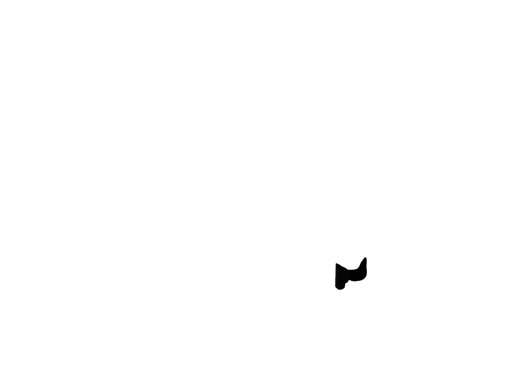

In [30]:
#print(len(masks))
#print(masks)
#print(type(masks[0]))

#maski = mask_utils.decode(masks[0]["segmentation"])
maski = masks[20]['segmentation']
print(maski)
image[maski==False] = [255,255,255]

plt.imshow(image)
plt.axis("off")
#plt.figure(figsize=(20,20))
#plt.imshow(image)
#show_anns(masks)
#plt.axis('on')
#plt.show() 